In [2]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15283, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 15283 (delta 40), reused 50 (delta 26), pack-reused 15186
Receiving objects: 100% (15283/15283), 13.75 MiB | 20.25 MiB/s, done.
Resolving deltas: 100% (10349/10349), done.


In [3]:
! cd darknet; head Makefile  

GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [4]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [5]:
! head Makefile

GPU=1
CUDNN=1
CUDNN_HALF=1
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [6]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [7]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [10]:
%cd ./darknet
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
!cp /content/drive/MyDrive/yolov4/yolov4.weights ./

/content/darknet


In [11]:
# copy over both datasets into the root directory of the Colab VM (comment out test.zip if you are not using a validation dataset)
!cp /mydrive/yolov4/obj.zip ../
!cp /mydrive/yolov4/test.zip ../

In [12]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/00009e5b390986a0.jpg  
  inflating: data/obj/00009e5b390986a0.txt  
  inflating: data/obj/0005ea10e0e14db1.jpg  
  inflating: data/obj/0005ea10e0e14db1.txt  
  inflating: data/obj/0009c4ddcaab18d3.jpg  
  inflating: data/obj/0009c4ddcaab18d3.txt  
  inflating: data/obj/001065dbc46c29c8.jpg  
  inflating: data/obj/001065dbc46c29c8.txt  
  inflating: data/obj/0010f4c10f7ab07e.jpg  
  inflating: data/obj/0010f4c10f7ab07e.txt  
  inflating: data/obj/0014e05dcc74d3f3.jpg  
  inflating: data/obj/0014e05dcc74d3f3.txt  
  inflating: data/obj/00166578c691cd43.jpg  
  inflating: data/obj/00166578c691cd43.txt  
  inflating: data/obj/001679a19bb6fd3f.jpg  
  inflating: data/obj/001679a19bb6fd3f.txt  
  inflating: data/obj/0016bd822c0a9511.jpg  
  inflating: data/obj/0016bd822c0a9511.txt  
  inflating: data/obj/00234c09cb4fa8e3.jpg  
  inflating: data/obj/00234c09cb4fa8e3.txt  
  inflating: data/obj/0023f6548005edf9.jpg  
  inflating

In [13]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4/obj.names ./data
!cp /mydrive/yolov4/obj.data ./data

In [14]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov4/generate_train.py ./
!cp /mydrive/yolov4/generate_test.py ./

In [15]:
!python generate_train.py
!python generate_test.py

In [16]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


In [ ]:
! sed -n -e 3p -e 4p -e 6p -e 7p -e 963p -e 970p -e 1051p -e 1058p -e 1139p -e 1146p cfg/yolov4-custom.cfg

#batch=1
#subdivisions=1
batch=64
subdivisions=16
filters=255
classes=80
filters=255
classes=80
filters=255
classes=80


In [ ]:
! sed -i '7s/16/4/' cfg/yolov4-custom.cfg

! sed -i '963s/255/18/' cfg/yolov4-custom.cfg
! sed -i '970s/80/1/' cfg/yolov4-custom.cfg

! sed -i '1051s/255/18/' cfg/yolov4-custom.cfg
! sed -i '1058s/80/1/' cfg/yolov4-custom.cfg

! sed -i '1139s/255/18/' cfg/yolov4-custom.cfg
! sed -i '1146s/80/1/' cfg/yolov4-custom.cfg


In [ ]:
! sed -n -e 3p -e 4p -e 6p -e 7p -e 963p -e 970p -e 1051p -e 1058p -e 1139p -e 1146p cfg/yolov4-custom.cfg

#batch=1
#subdivisions=1
batch=64
subdivisions=4
filters=18
classes=1
filters=18
classes=1
filters=18
classes=1


In [17]:
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137
!cp /mydrive/yolov4/yolov4.conv.137 ./

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj.data yolov4-obj.cfg /mydrive/yolov4/backup/round-1/yolov4-obj_last.weights -dont_show -map

串流輸出內容已截斷至最後 5000 行。
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.884356), count: 3, class_loss = 0.001290, iou_loss = 0.117496, total_loss = 0.118787 
 total_bbox = 421298, rewritten_bbox = 0.047947 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.595749), count: 7, class_loss = 1.315165, iou_loss = 41.816715, total_loss = 43.131882 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.868657), count: 1, class_loss = 0.016251, iou_loss = 0.045589, total_loss = 0.061840 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.815967), count: 2, class_loss = 0.000828, iou_loss = 0.104525, total_loss = 0.105354 
 total_bbox = 421308, rewritten_bbox = 0.047946 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.761295), count: 4, class_loss = 0.297444, iou_loss = 6.668925, total_loss = 6.966370 
v3 (iou loss, Normalizer: (iou

In [21]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

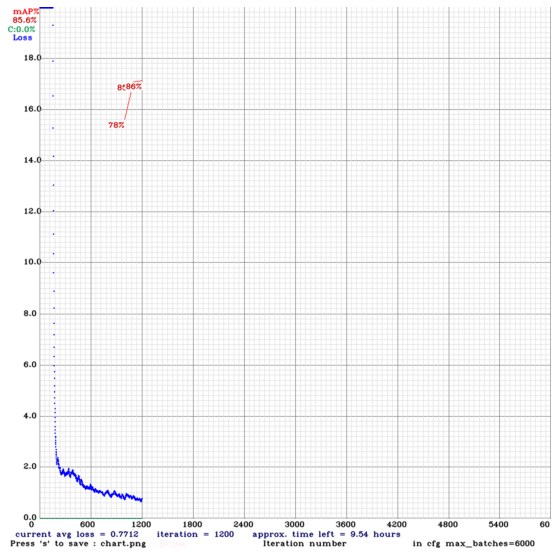

In [ ]:
# show chart.png of how custom object detector did with training
imShow('/mydrive/yolov4/backup/chart.png')

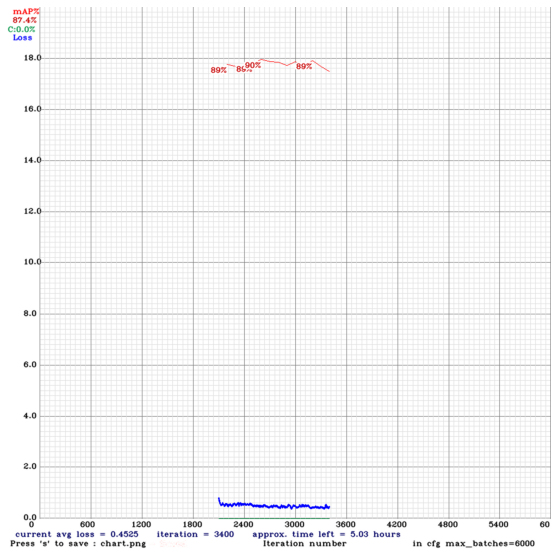

In [ ]:
imShow('/mydrive/yolov4/backup/chart (6).png')

In [ ]:
!./darknet detector map data/obj.data yolov4-obj.cfg /mydrive/yolov4/backup/round-2/yolov4-obj_best.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

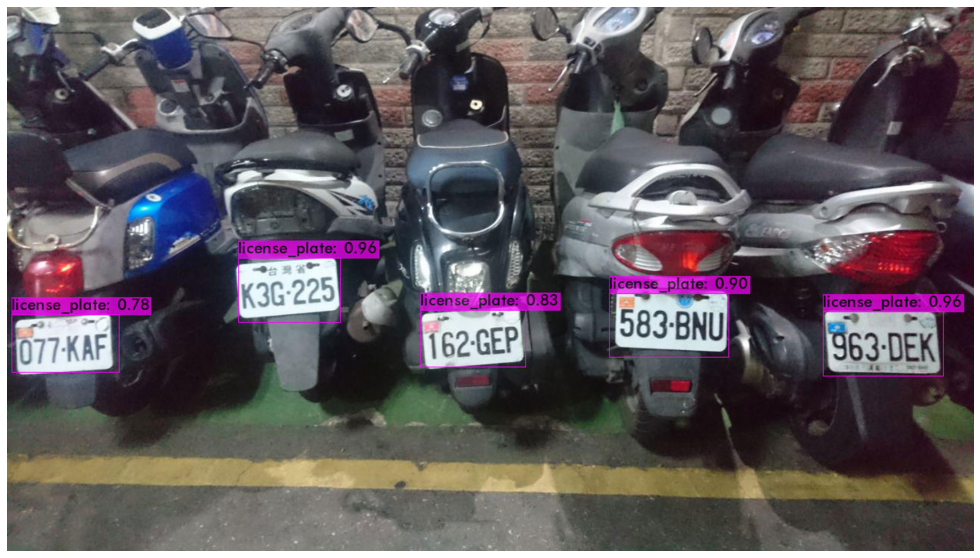

In [27]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/yolov4-obj_best.weights /mydrive/yolov4/images/01.jpg -thresh 0.3 
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

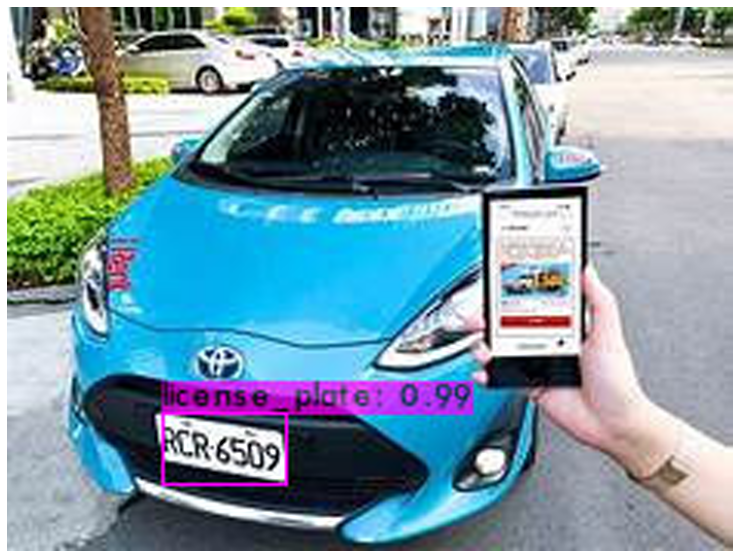

In [28]:
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/yolov4-obj_best.weights /mydrive/yolov4/images/th.jpg -thresh 0.3 
imShow('predictions.jpg')